# Autocorrelation: 2 Sources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage import draw
from scipy import signal
from PIL import Image

In this file, we will convolute an image with 2 sources with an PSF and then, we will computar an autocorrelation

## Part I - Simulated Image

First, we upload the PSF (h(t)) and generate the sources (x(t))

(3280, 2464)
(410, 308)
mean: 133.30067310738042
mean: 5.473677330910876e-15
(308, 410)
410
308
h(t) imported and reduced correctly!


<function matplotlib.pyplot.show(close=None, block=None)>

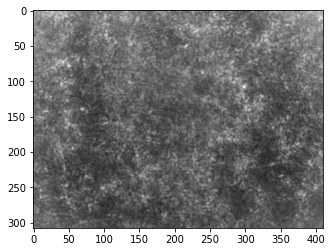

In [2]:
# Import filter (h(t))
h = Image.open('images/h_0001.jpg')
realsize=h.size
print(realsize)
factor=8
newsize=tuple(int(ti/factor) for ti in realsize)
print(newsize)
h=h.resize(newsize,Image.ANTIALIAS)
h = np.array(h,dtype=float)
h = h[:, :, 0] #RGB to Gray-scale
print('mean:',h.mean())
h = h - h.mean()
print('mean:',h.mean())
size_x = len(h[0])
size_y = len(h)
print(h.shape) #[Y,X]
print(size_x)
print(size_y)
print('h(t) imported and reduced correctly!')

plt.imshow(h,cmap='gray')
plt.show

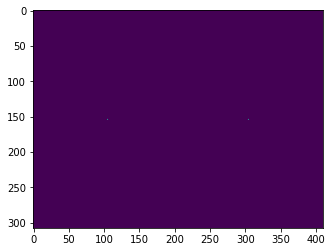

In [3]:
def sources_s(dist,sx,sy):
    # sx = len(hfilter[0])
    # sy = len(hfilter)
    output=np.zeros((sy,sx), dtype=float) #Generates a sy by sx null matrix
    output[math.floor(sy/2),math.ceil((sx-1)/2-dist)]=1  #Sets to 1 a position at distance -dist respect to the center
    output[math.floor(sy/2),math.floor((sx-1)/2+dist)]=1 #Sets to 1 a position at distance +dist respect to the center
    return output

d0=100
x=sources_s(d0,size_x,size_y)

plt.imshow(x)
plt.show()

We obtain y(t)=x(t)*h(t) by using fftconvolve()

(308, 410)


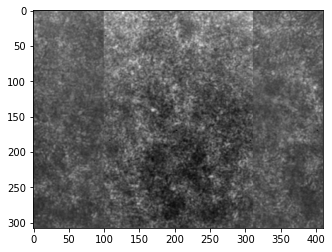

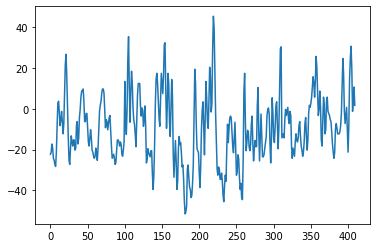

In [4]:
y=signal.fftconvolve(x,h,mode='same')

# Plotting
print(y.shape)

plt.imshow(y, cmap='gray')
plt.show()

plt.plot(y[150,:])
plt.show()

We compute the autocorrelation of y(t)

308 410


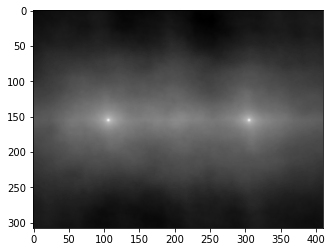

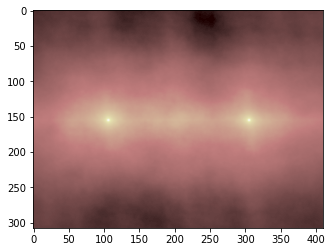

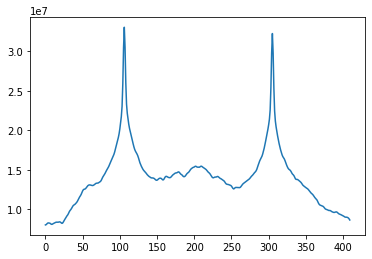

In [13]:
hf = np.flip(h)

auto=signal.fftconvolve(y,hf,mode='same')

# Plotting
[auto_y,auto_x]=auto.shape
print(auto_y,auto_x)

plt.imshow(auto, cmap='gray')
plt.show()

plt.imshow(auto, cmap='pink')
plt.show()

plt.plot(auto[math.floor(auto_y/2)+1,:])
plt.show()

## Part II - Disks instead of points

We generate a disk and we convolve it with the 2 points to get 2 disks

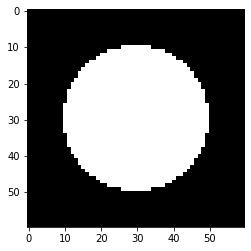

In [23]:
#Image with disk: x(t)
def surface_disk(radi,sx,sy):
    arr = np.zeros((sy, sx), dtype=float)
    rr, cc = draw.disk(((sy-1)/2,(sx-1)/2),radi)
    arr[rr, cc] = 1
    return arr

radius=20
disks1=surface_disk(radius,radius*3,radius*3)

plt.imshow(disks1, cmap='gray')
plt.show()

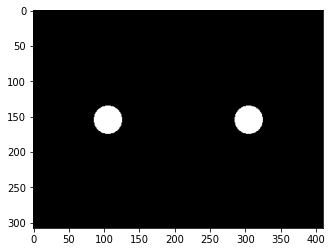

In [24]:
disks2 = signal.fftconvolve(x, disks1, mode='same')

plt.imshow(disks2, cmap='gray')
plt.show()

Convolve + Autocorrelation

(308, 410)


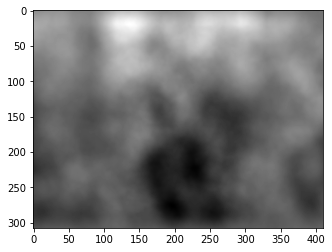

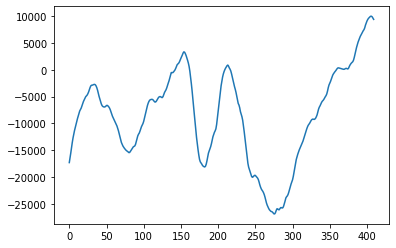

In [25]:
y=signal.fftconvolve(disks2,h,mode='same')

# Plotting
print(y.shape)

plt.imshow(y, cmap='gray')
plt.show()

plt.plot(y[150,:])
plt.show()

(308, 410)


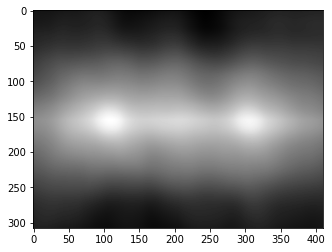

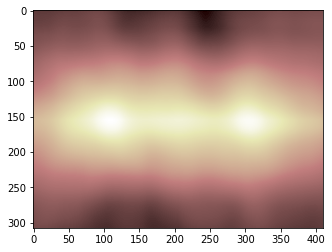

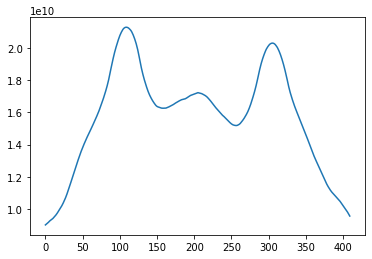

In [26]:
hf = np.flip(h)

auto=signal.fftconvolve(y,hf,mode='same')

# Plotting
[auto_y,auto_x]=auto.shape
print(auto.shape)

plt.imshow(auto, cmap='gray')
plt.show()

plt.imshow(auto, cmap='pink')
plt.show()

plt.plot(auto[math.floor(auto_y/2)+1,:])
plt.show()

## Part III - The same as Part I but with h(t) is random noise

In [27]:
[size_y,size_x]=(100,200)

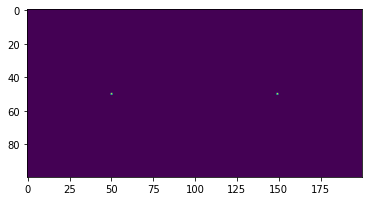

In [28]:
#x(t)
d0=50
x=sources_s(d0,size_x,size_y)

plt.imshow(x)
plt.show()

mean: -0.00548313225578065
mean: 8.526512829121201e-18


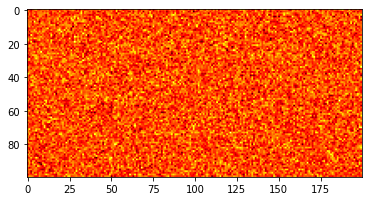

In [33]:
h = np.random.randn(size_y, size_x)
print('mean:',h.mean())
h = h - h.mean()
print('mean:',h.mean())

plt.imshow(h,cmap='hot')
plt.show()

(100, 200)


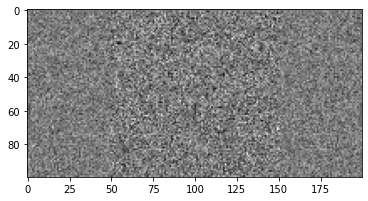

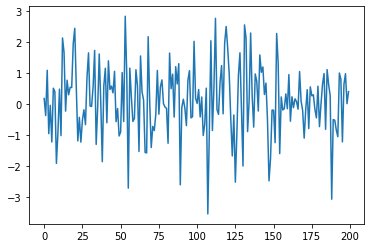

In [34]:
y=signal.fftconvolve(x,h,mode='same')

# Plotting
print(y.shape)

plt.imshow(y, cmap='gray')
plt.show()

plt.plot(y[50,:])
plt.show()

(100, 200)


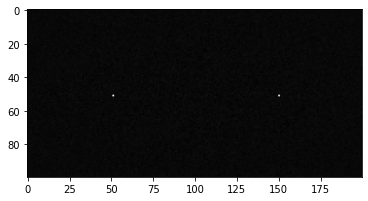

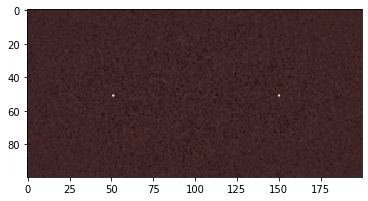

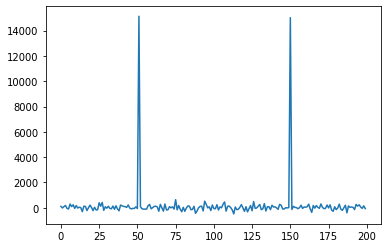

In [41]:
hf = np.flip(h)

auto=signal.fftconvolve(y,hf,mode='same')

# Plotting
[auto_y,auto_x]=auto.shape
print(auto.shape)

plt.imshow(auto, cmap='gray')
plt.show()

plt.imshow(auto, cmap='pink')
plt.show()

plt.plot(auto[math.floor(auto_y/2+1),:])
plt.show()